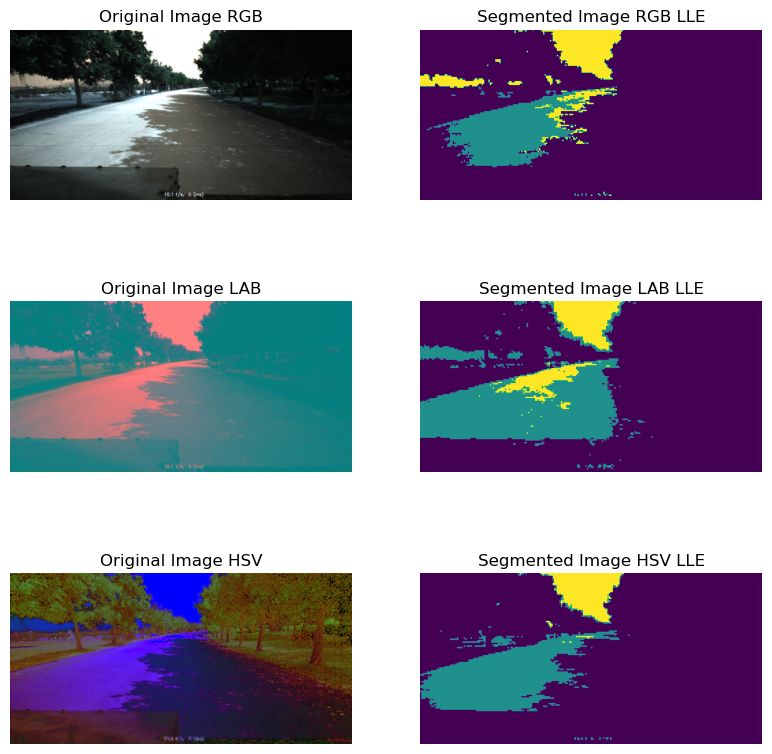

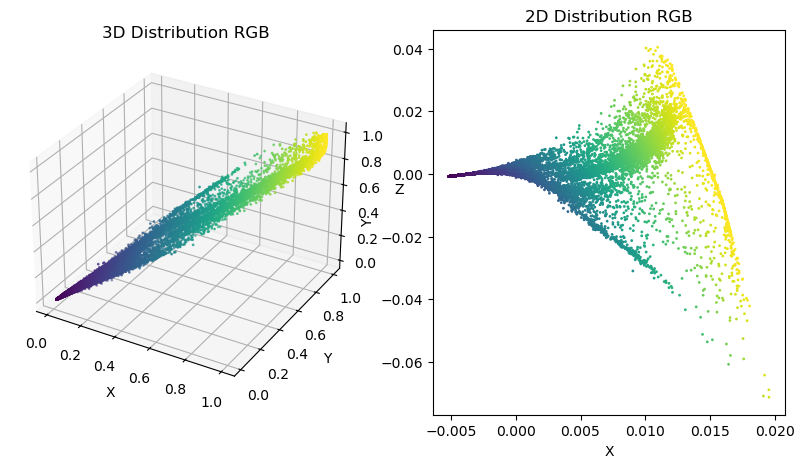

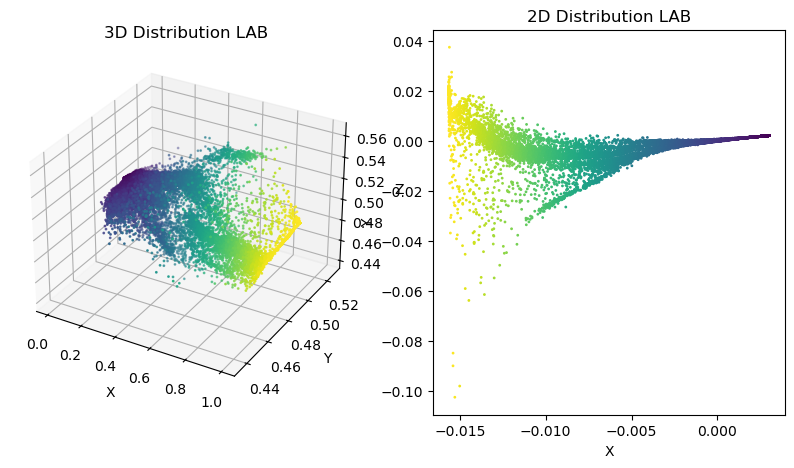

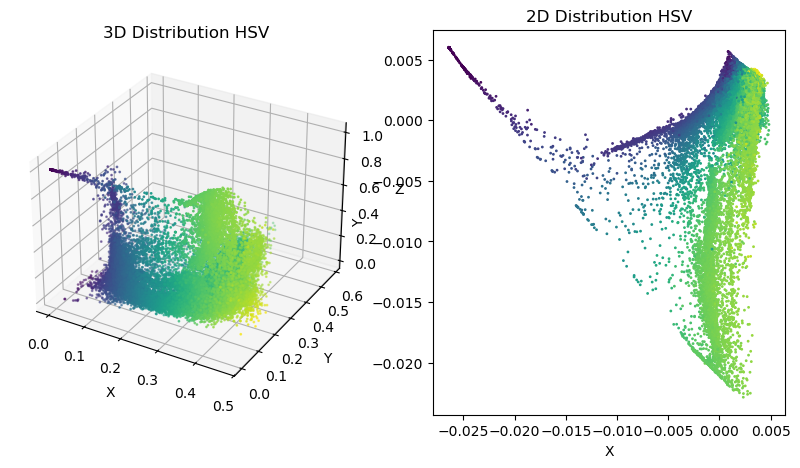

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.cluster import KMeans
from skimage.transform import resize

# Load the image path
image_path = '../../data/imgs/0854.png'
image = cv2.imread(image_path)

# Check if the image is successfully loaded
if image is None:
    print("image read error")
else:
    # Convert the image to RGB, LAB, and HSV color spaces
    image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_LAB = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    image_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Initialize the Locally Linear Embedding (LLE) model
lle = LocallyLinearEmbedding(n_neighbors=75, n_components=2, method='standard')

# Get the original image shape
original_shape = image.shape

# RGB
# Resize the image to reduce computational complexity
image_resized_RGB = resize(image_RGB, (image_RGB.shape[0] // 2, image_RGB.shape[1] // 2), anti_aliasing=True)
# Flatten the image for LLE processing
image_flat_lle_RGB = image_resized_RGB.reshape(-1, 3)
# Apply LLE dimensionality reduction
image_reduced_lle_RGB = lle.fit_transform(image_flat_lle_RGB)

# LAB
# Resize the LAB image
image_resized_LAB = resize(image_LAB, (image_LAB.shape[0] // 2, image_LAB.shape[1] // 2), anti_aliasing=True)
# Flatten the LAB image for LLE processing
image_flat_lle_LAB = image_resized_LAB.reshape(-1, 3)
# Apply LLE dimensionality reduction
image_reduced_lle_LAB = lle.fit_transform(image_flat_lle_LAB)

# HSV
# Resize the HSV image
image_resized_HSV = resize(image_HSV, (image_HSV.shape[0] // 2, image_HSV.shape[1] // 2), anti_aliasing=True)
# Flatten the HSV image for LLE processing
image_flat_lle_HSV = image_resized_HSV.reshape(-1, 3)
# Apply LLE dimensionality reduction
image_reduced_lle_HSV = lle.fit_transform(image_flat_lle_HSV)

# k-means cluster
n_clusters = 3  

# RGB
# Perform k-means clustering on the RGB image
kmeans_RGB = KMeans(n_clusters=n_clusters, random_state=42)
labels_RGB = kmeans_RGB.fit_predict(image_reduced_lle_RGB)
# Reshape the labels to the image shape
segmented_image_RGB = labels_RGB.reshape(image_resized_RGB.shape[0], image_resized_RGB.shape[1])

# LAB
# Perform k-means clustering on the LAB image
kmeans_LAB = KMeans(n_clusters=n_clusters, random_state=42)
labels_LAB = kmeans_LAB.fit_predict(image_reduced_lle_LAB)
# Reshape the labels to the image shape
segmented_image_LAB = labels_LAB.reshape(image_resized_LAB.shape[0], image_resized_LAB.shape[1])

# HSV
# Perform k-means clustering on the HSV image
kmeans_HSV = KMeans(n_clusters=n_clusters, random_state=42)
labels_HSV = kmeans_HSV.fit_predict(image_reduced_lle_HSV)
# Reshape the labels to the image shape
segmented_image_HSV = labels_HSV.reshape(image_resized_HSV.shape[0], image_resized_HSV.shape[1])

# Display the original and segmented images
plt.figure(figsize=(15, 10))

# Original and Segmented Images
plt.subplot(3, 3, 1)
plt.imshow(image)
plt.title("Original Image RGB")
plt.axis("off")

plt.subplot(3, 3, 2)
plt.imshow(segmented_image_RGB, cmap='viridis')
plt.title("Segmented Image RGB LLE")
plt.axis("off")

plt.subplot(3, 3, 4)
plt.imshow(image_LAB)
plt.title("Original Image LAB")
plt.axis("off")

plt.subplot(3, 3, 5)
plt.imshow(segmented_image_LAB, cmap='viridis')
plt.title("Segmented Image LAB LLE")
plt.axis("off")

plt.subplot(3, 3, 7)
plt.imshow(image_HSV)
plt.title("Original Image HSV")
plt.axis("off")

plt.subplot(3, 3, 8)
plt.imshow(segmented_image_HSV, cmap='viridis')
plt.title("Segmented Image HSV LLE")
plt.axis("off")


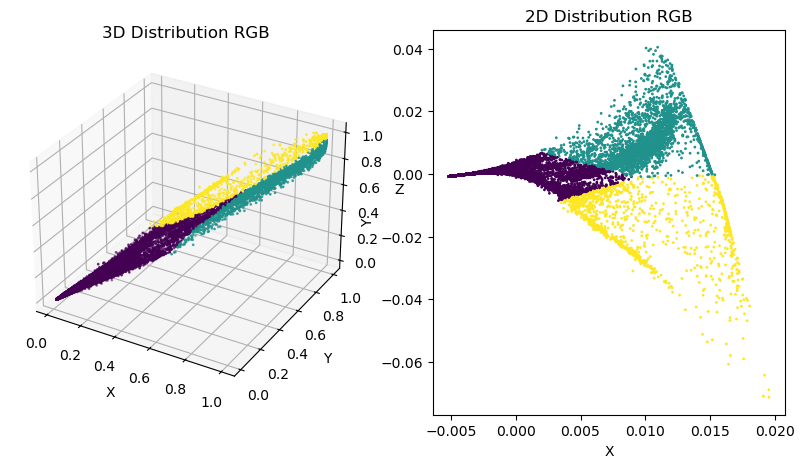

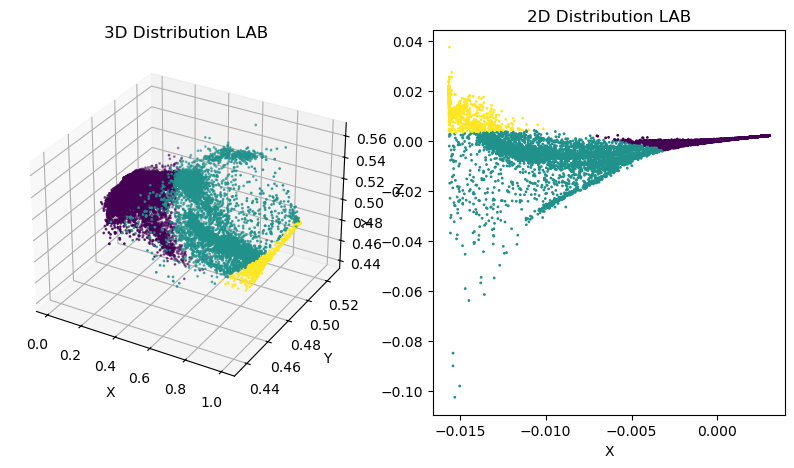

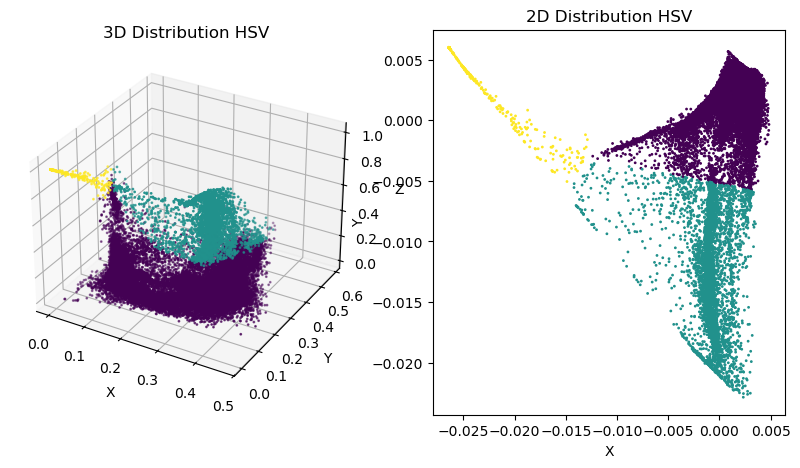

In [6]:
# 3D and 2D Scatter Plots
def plot_3d_and_2d(data_3d, data_2d, labels, title):
    fig = plt.figure(figsize=(10, 5))
    
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels, cmap='viridis', marker='o', s=1)
    ax1.set_title(f"3D Distribution {title}")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', marker='o', s=1)
    ax2.set_title(f"2D Distribution {title}")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')

# Plot RGB
plot_3d_and_2d(image_flat_lle_RGB, image_reduced_lle_RGB, labels_RGB, "RGB")

# Plot LAB
plot_3d_and_2d(image_flat_lle_LAB, image_reduced_lle_LAB, labels_LAB, "LAB")

# Plot HSV
plot_3d_and_2d(image_flat_lle_HSV, image_reduced_lle_HSV, labels_HSV, "HSV")

plt.show()